In [1]:
import pymysql
import pandas as pd
from  nltk.corpus import stopwords
from collections import Counter

In [6]:
con = pymysql.connect(host='127.0.0.1',user='root',charset='utf8',db='abc',passwd='1234')
sql = "SELECT text,user_followers_count FROM tweets"
df = pd.read_sql(sql,con)
df

,text,user_followers_count
0,Unable to obtain any masks amid the #coronavir...,712949
1,#Virus dents #bookings for #IHG; #Japan may lo...,1863
2,#day14 unpack and pack again. No more unpack u...,4573
3,@MtRdefender @rthk_enews What if one of them i...,25
4,"@TwitterMoments Uyghur Muslims, Tibetans, Chri...",654
...,...,...
6172,The Keshe Foundation is trying to help many wi...,1250
6173,Development of vaccine against new #coronaviru...,758
6174,Breaking News: Multiple US troop casualties af...,190
6175,Tim Pool: “I’m beginning to think we got a ser...,1607


In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [16]:
#  followers count>100000
df2 = df[df['user_followers_count'] > 100000]
df2

,text,user_followers_count
0,Unable to obtain any masks amid the #coronavir...,712949
8,This dog was left alone when its owner got stu...,712948
26,- Japan reports 88 more #DiamondPrincess passe...,164729
28,Staying indoors doesn't mean neglecting fitnes...,712948
33,Despite an apparent decline in the number of d...,712948
...,...,...
5809,ICYMI: A botched test result from the U.S. Cen...,180621
5827,China #coronavirus reporting ?. Survival doesn...,144552
5948,871 have died from #coronavirus in #China's Hu...,452628
6104,#Coronavirus death toll climbs to 722 in #Chin...,127153


In [18]:
from textblob import TextBlob

output = []

for context in df2['text']:
    blob = TextBlob(context)
    output.append(blob.sentiment)
    
print(output[:10])

[Sentiment(polarity=-0.25, subjectivity=0.25), Sentiment(polarity=0.0, subjectivity=0.0), Sentiment(polarity=0.3333333333333333, subjectivity=0.7166666666666667), Sentiment(polarity=-0.3125, subjectivity=0.6875), Sentiment(polarity=0.05, subjectivity=0.35), Sentiment(polarity=0.8, subjectivity=1.0), Sentiment(polarity=-0.25, subjectivity=0.25), Sentiment(polarity=0.05, subjectivity=0.35), Sentiment(polarity=0.8, subjectivity=1.0), Sentiment(polarity=0.5, subjectivity=0.5)]


(array([ 1.,  2.,  2.,  1.,  6.,  6., 51., 11., 11., 13.,  7.,  9.,  1.,
         0.,  2.]),
 array([-0.66666667, -0.56888889, -0.47111111, -0.37333333, -0.27555556,
        -0.17777778, -0.08      ,  0.01777778,  0.11555556,  0.21333333,
         0.31111111,  0.40888889,  0.50666667,  0.60444444,  0.70222222,
         0.8       ]),
 <a list of 15 Patch objects>)

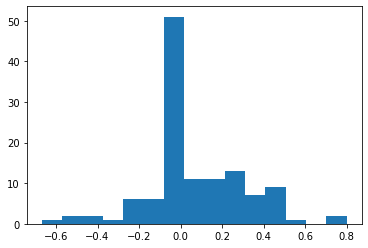

In [25]:
polarity_list = []
for i in output:
    polarity_list.append(i.polarity)
plt.hist(polarity_list,bins=15)